In [61]:
options(stringsAsFactors = F)
library(reshape2)
library(ggplot2)
library(plyr)
library(stringr)
library(MASS)
source("xtable.r")

In [62]:
if (!file.exists("deaths.rds")) {
  deaths <- read.csv("data//deaths08.csv.bz2")
  unlink("deaths08.csv.bz2")
  deaths$hod[deaths$hod == 99] <- NA
  deaths$hod[deaths$hod == 24] <- 0
  deaths$hod[deaths$hod == 0] <- NA
  deaths$hod <- as.integer(deaths$hod)  
  deaths <- arrange(deaths, yod, mod, dod, hod, cod)
  deaths <- deaths[c("yod", "mod", "dod", "hod", "cod")]
  
  saveRDS(deaths, "deaths.rds")
}

In [63]:
deaths <- readRDS("deaths.rds")

In [64]:
deaths <- subset(deaths, yod == 2008 & mod != 0 & dod != 0)
xtable(deaths[c(1, 1:14 * 2000), c("yod", "mod", "dod", "hod", "cod")], 
"raw.tex")

In [65]:
codes <- read.csv("icd-main.csv")
codes$disease <- sapply(codes$disease, function(x)
  str_c(strwrap(x, width = 30), collapse = "\n"))
names(codes)[1] <- "cod"
codes <- codes[!duplicated(codes$cod), ]

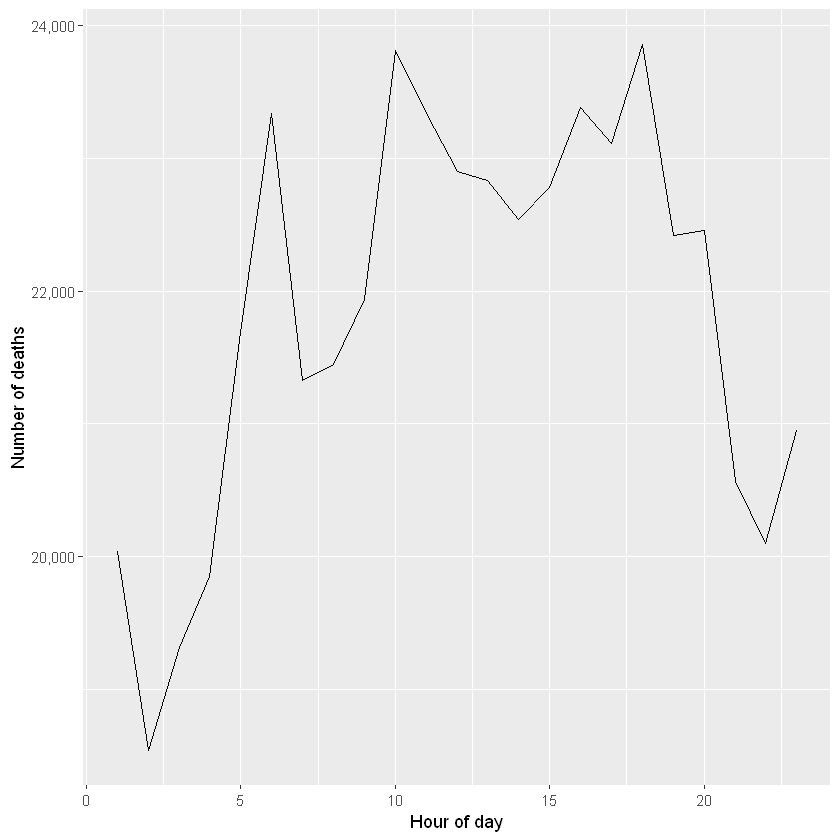

In [66]:
# Display overall hourly deaths
hod_all <- subset(count(deaths, "hod"), !is.na(hod))
qplot(hod, freq, data = hod_all, geom = "line") + 
  scale_y_continuous("Number of deaths", labels = function(x) format(x, big.mark = ",")) + 
  xlab("Hour of day")
ggsave("overall.pdf", width = 10, height = 6)

In [67]:
# Count deaths per hour, per disease
hod2 <- count(deaths, c("cod", "hod"))
hod2 <- subset(hod2, !is.na(hod))
hod2 <- join(hod2, codes)
hod2 <- ddply(hod2, "cod", transform, prop = freq / sum(freq))
xtable(hod2, "hod2.tex", digits=c(3,3,3,3,3,4))
hod2

Joining by: cod


cod,hod,freq,disease,prop
A01,1,3,Typhoid and paratyphoid fevers,0.06250000
A01,2,1,Typhoid and paratyphoid fevers,0.02083333
A01,3,3,Typhoid and paratyphoid fevers,0.06250000
A01,5,4,Typhoid and paratyphoid fevers,0.08333333
A01,6,1,Typhoid and paratyphoid fevers,0.02083333
A01,8,1,Typhoid and paratyphoid fevers,0.02083333
A01,10,2,Typhoid and paratyphoid fevers,0.04166667
A01,11,2,Typhoid and paratyphoid fevers,0.04166667
A01,12,1,Typhoid and paratyphoid fevers,0.02083333
A01,13,6,Typhoid and paratyphoid fevers,0.12500000


In [68]:
# Compare to overall abundance
overall <- ddply(hod2, "hod", summarise, freq_all = sum(freq))
overall <- mutate(overall, prop_all = freq_all / sum(freq_all))
overall

hod,freq_all,prop_all
1,20038,0.03987503
2,18545,0.03690400
3,19320,0.03844623
4,19850,0.03950092
5,21689,0.04316047
6,23333,0.04643198
7,21327,0.04244010
8,21450,0.04268487
9,21939,0.04365796
10,23811,0.04738319


In [69]:
hod2 <- join(overall, hod2, by = "hod")
xtable(hod2, "hod2Overall.tex", digits=c(4,4,4,4,4,4,4,4))
hod2

hod,freq_all,prop_all,cod,freq,disease,prop
1,20038,0.03987503,A01,3,Typhoid and paratyphoid fevers,0.062500000
1,20038,0.03987503,A02,3,Other salmonella infections,0.048387097
1,20038,0.03987503,A04,7,Other bacterial intestinal infections,0.051094891
1,20038,0.03987503,A05,1,"Other bacterial foodborne intoxications, not elsewhere classified",0.050000000
1,20038,0.03987503,A06,2,Amebiasis,0.024390244
1,20038,0.03987503,A09,111,Diarrhea and gastroenteritis of infectious origin,0.036803714
1,20038,0.03987503,A15,2,NA,0.009852217
1,20038,0.03987503,A16,53,"Respiratory tuberculosis, not confirmed bacteriologically or histologically",0.032277710
1,20038,0.03987503,A17,2,Tuberculosis of nervous system,0.021052632
1,20038,0.03987503,A18,5,Tuberculosis of other organs,0.054347826


In [70]:
# Pick better subset of rows to show
cods <- join(arrange(count(deaths, "cod"), desc(freq)), codes)
mutate(tail(subset(cods, freq > 100), 30), disease = str_sub(disease, 1, 30))
cods

Joining by: cod


,cod,freq,disease
316,Q43,124,Other congenital malformations
317,N05,123,Unspecified nephritic syndrome
318,I31,119,Other diseases of pericardium
319,Q23,118,Congenital malformations of ao
320,Q44,118,Congenital malformations of ga
321,J21,117,Acute bronchiolitis
322,V04,116,Pedestrian injured in collisio
323,C51,115,Malignant neoplasm of vulva
324,X44,114,Accidental poisoning by and ex
325,Y57,113,Adverse effects in therapeutic


cod,freq,disease
I21,47676,Acute myocardial infarction
E11,43222,Non-insulin-dependent diabetes mellitus
E14,27689,Unspecified diabetes mellitus
J44,16192,Other chronic obstructive pulmonary disease
K70,13118,Alcoholic liver disease
J18,12748,"Pneumonia, organism unspecified"
K74,12741,Fibrosis and cirrhosis of liver
I25,10234,Chronic ischemic heart disease
X59,8893,Exposure to unspecified factor
I50,8601,Heart failure


In [71]:
hod3 <- subset(hod2, cod %in% c("I21", "N18", "E84", "B16") & hod >= 8 & hod <= 12)[1:15, c("hod", "cod", "disease", "freq", "prop", "freq_all", "prop_all")]
xtable(hod3, "hod3.tex")
hod3

,hod,cod,disease,freq,prop,freq_all,prop_all
4615,8,B16,Acute hepatitis B,4,0.03883495,21450,0.04268487
4764,8,E84,Cystic fibrosis,3,0.03030303,21450,0.04268487
4829,8,I21,Acute myocardial infarction,2155,0.04715742,21450,0.04268487
5005,8,N18,Chronic renal failure,309,0.04124950,21450,0.04268487
5280,9,B16,Acute hepatitis B,7,0.06796117,21939,0.04365796
5445,9,E84,Cystic fibrosis,1,0.01010101,21939,0.04365796
5508,9,I21,Acute myocardial infarction,2153,0.04711366,21939,0.04365796
5679,9,N18,Chronic renal failure,327,0.04365238,21939,0.04365796
5965,10,B16,Acute hepatitis B,10,0.09708738,23811,0.04738319
6124,10,E84,Cystic fibrosis,7,0.07070707,23811,0.04738319


In [72]:
xtable(hod3[c("hod", "cod", "freq")], "counts.tex")
xtable(hod3[c("disease")], "counts-disease.tex")
xtable(hod3[5], "counts-prop.tex")
xtable(hod3[6:7], "counts-all.tex")
xtable(hod3, "hod3-2.tex")
hod3

,hod,cod,disease,freq,prop,freq_all,prop_all
4615,8,B16,Acute hepatitis B,4,0.03883495,21450,0.04268487
4764,8,E84,Cystic fibrosis,3,0.03030303,21450,0.04268487
4829,8,I21,Acute myocardial infarction,2155,0.04715742,21450,0.04268487
5005,8,N18,Chronic renal failure,309,0.04124950,21450,0.04268487
5280,9,B16,Acute hepatitis B,7,0.06796117,21939,0.04365796
5445,9,E84,Cystic fibrosis,1,0.01010101,21939,0.04365796
5508,9,I21,Acute myocardial infarction,2153,0.04711366,21939,0.04365796
5679,9,N18,Chronic renal failure,327,0.04365238,21939,0.04365796
5965,10,B16,Acute hepatitis B,10,0.09708738,23811,0.04738319
6124,10,E84,Cystic fibrosis,7,0.07070707,23811,0.04738319


In [73]:
devi <- ddply(hod2, "cod", summarise, n = sum(freq), 
  dist = mean((prop - prop_all)^2))
devi <- subset(devi, n > 50)
write.csv(devi, file = "devi.csv")
devi

,cod,n,dist
2,A02,62,7.381418e-04
4,A04,137,2.082166e-04
6,A06,82,4.050016e-04
9,A09,3016,2.843275e-05
10,A15,203,2.201151e-04
11,A16,1642,2.926542e-05
12,A17,95,5.034215e-04
13,A18,92,5.311087e-04
14,A19,146,3.685442e-04
25,A41,4120,1.321036e-05


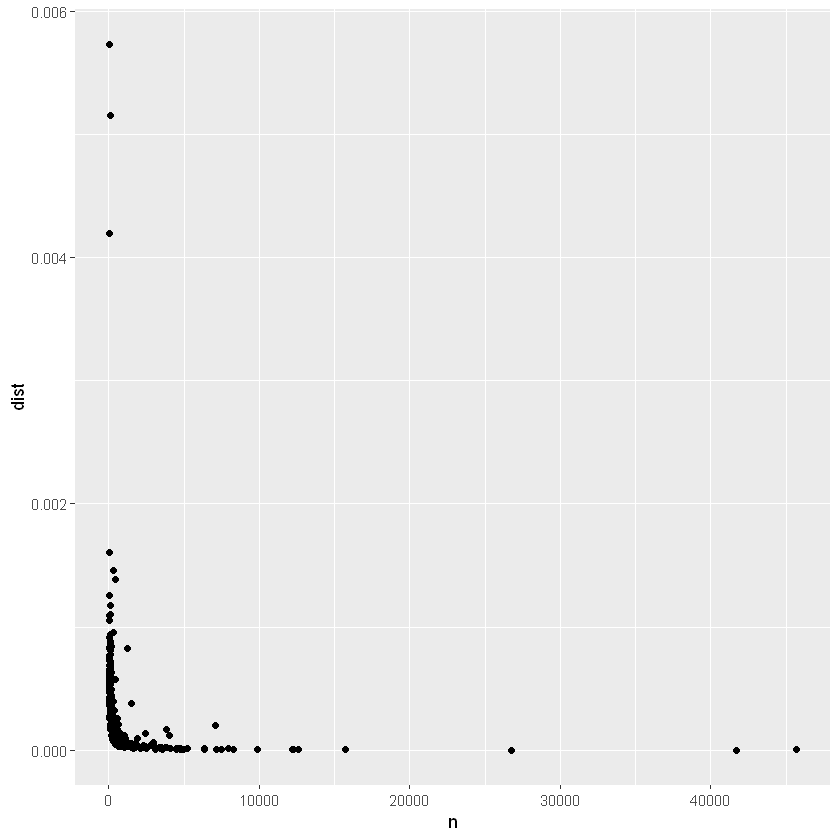

In [74]:
# Find outliers
xlog10 <- scale_x_log10(
  breaks = c(100, 1000, 10000), 
  labels = c(100, 1000, 10000), 
  minor_breaks = log10(outer(1:9, 10^(1:5), "*")))
ylog10 <- scale_y_log10(
  breaks = 10 ^ -c(3, 4, 5), 
  labels = c("0.001", "0.0001", "0.00001"),
minor_breaks = log10(outer(1:9, 10^-(3:6), "*")))

qplot(n, dist, data = devi)
ggsave("n-dist-raw.pdf", width = 6, height = 6)

Warning message in self$trans$transform(self$minor_breaks):
"Se han producido NaNs"

Warning message in self$trans$transform(self$minor_breaks):
"Se han producido NaNs"

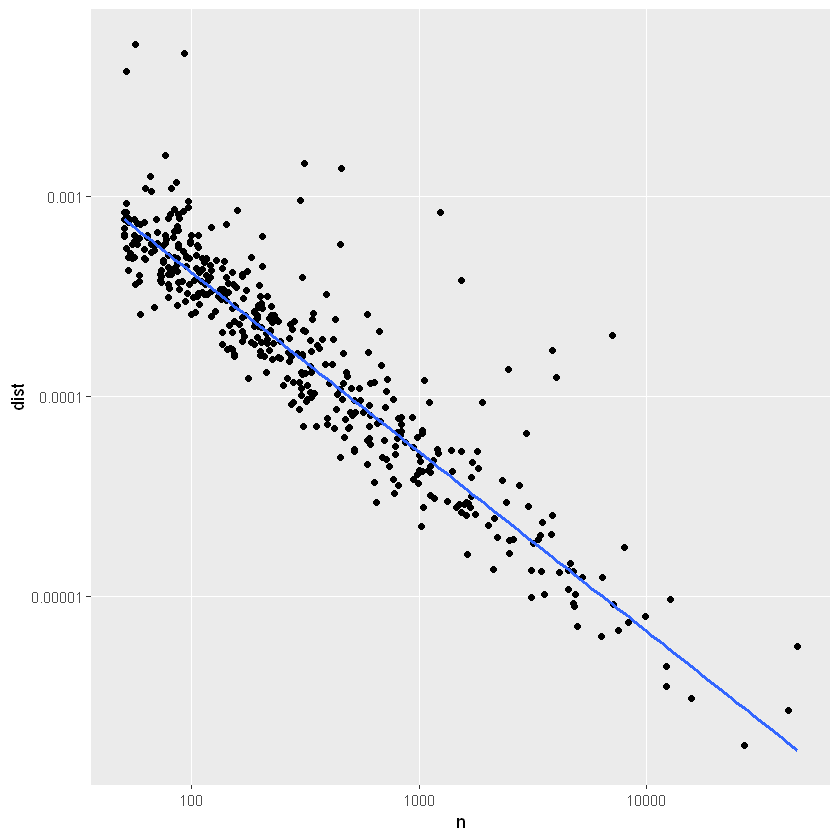

In [75]:
qplot(n, dist, data = devi) + 
  geom_smooth(method = "rlm", se = F) + 
  xlog10 + 
  ylog10
ggsave("n-dist-log.pdf", width = 6, height = 6)

(Intercept)      log(n) 
  -3.652844   -0.896639

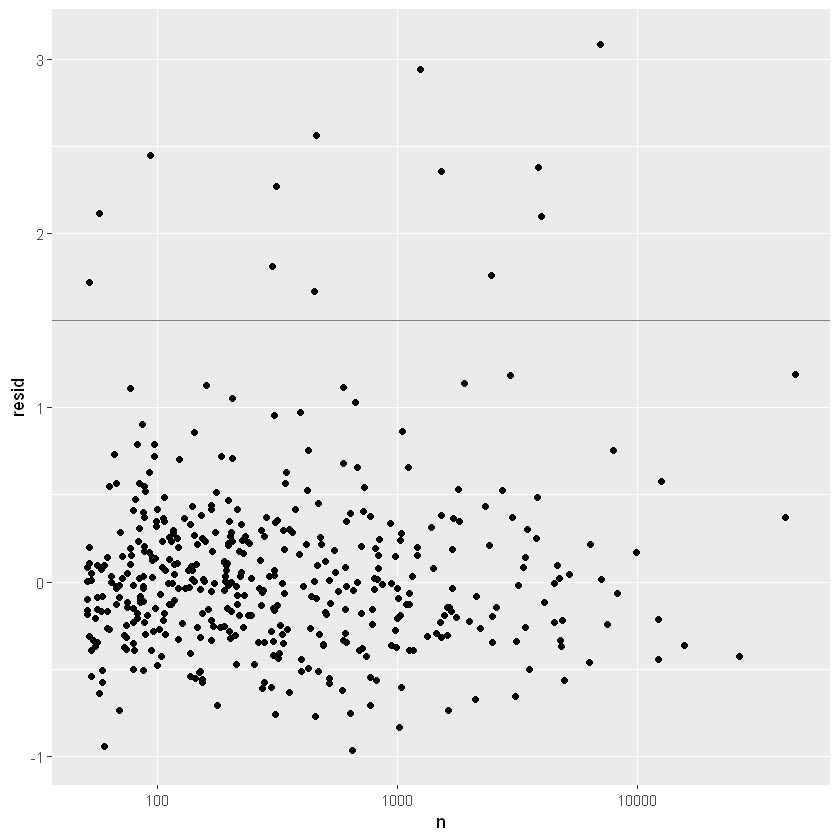

In [76]:
devi$resid <- resid(rlm(log(dist) ~ log(n), data = devi))
coef(rlm(log(dist) ~ log(n), data = devi))
ggplot(devi, aes(n, resid)) + 
  geom_hline(yintercept = 1.5, colour = "grey50") +
  geom_point() + 
  xlog10
ggsave("n-dist-resid.pdf", width = 6, height = 6)

In [77]:
unusual <- subset(devi, resid > 1.5)
unusual

,cod,n,dist,resid
914,R95,312,0.0014609681,2.273589
923,V09,3863,0.0001698449,2.377740
970,V79,52,0.0041930605,1.721359
976,V87,2457,0.0001372850,1.759181
978,V89,3999,0.0001242112,2.095862
984,V95,57,0.0057307769,2.116097
1044,W69,458,0.0013831223,2.563022
1046,W73,300,0.0009559106,1.814232
1047,W74,1246,0.0008262351,2.945181
1059,W87,450,0.0005752301,1.669894


In [78]:
hod_unusual_big <- match_df(hod2, subset(unusual, n > 350))
hod_unusual_big

Matching on: cod


,hod,freq_all,prop_all,cod,freq,disease,prop
537,1,20038,0.03987503,V09,144,Pedestrian injured in other and unspecified transport accidents,0.03727673
559,1,20038,0.03987503,V87,122,Traffic accident of specified type but victim's mode of transport unknown,0.04965405
560,1,20038,0.03987503,V89,196,"Motor- or nonmotor-vehicle accident, type of vehicle unspecified",0.04901225
579,1,20038,0.03987503,W69,6,Drowning and submersion while in natural water,0.01310044
582,1,20038,0.03987503,W74,16,Unspecified drowning and submersion,0.01284109
589,1,20038,0.03987503,W87,11,Exposure to unspecified electric current,0.02444444
622,1,20038,0.03987503,X95,432,Assault (homicide) by other and unspecified firearm discharge,0.06119847
625,1,20038,0.03987503,X99,129,Assault (homicide) by sharp object,0.08431373
1180,2,18545,0.03690400,V09,138,Pedestrian injured in other and unspecified transport accidents,0.03572353
1202,2,18545,0.03690400,V87,105,Traffic accident of specified type but victim's mode of transport unknown,0.04273504


In [79]:
hod_unusual_sml <- match_df(hod2, subset(unusual, n <= 350))
hod_unusual_sml

Matching on: cod


,hod,freq_all,prop_all,cod,freq,disease,prop
529,1,20038,0.03987503,R95,13,Sudden infant death syndrome,0.041666667
581,1,20038,0.03987503,W73,6,Other specified drowning and submersion,0.020000000
1174,2,18545,0.03690400,R95,21,Sudden infant death syndrome,0.067307692
1199,2,18545,0.03690400,V79,2,Bus occupant injured in other and unspecified transport accidents,0.038461538
1225,2,18545,0.03690400,W73,1,Other specified drowning and submersion,0.003333333
1249,2,18545,0.03690400,X33,1,Victim of lightning,0.010752688
1827,3,19320,0.03844623,R95,27,Sudden infant death syndrome,0.086538462
1850,3,19320,0.03844623,V79,15,Bus occupant injured in other and unspecified transport accidents,0.288461538
1882,3,19320,0.03844623,W73,10,Other specified drowning and submersion,0.033333333
2481,4,19850,0.03950092,R95,32,Sudden infant death syndrome,0.102564103


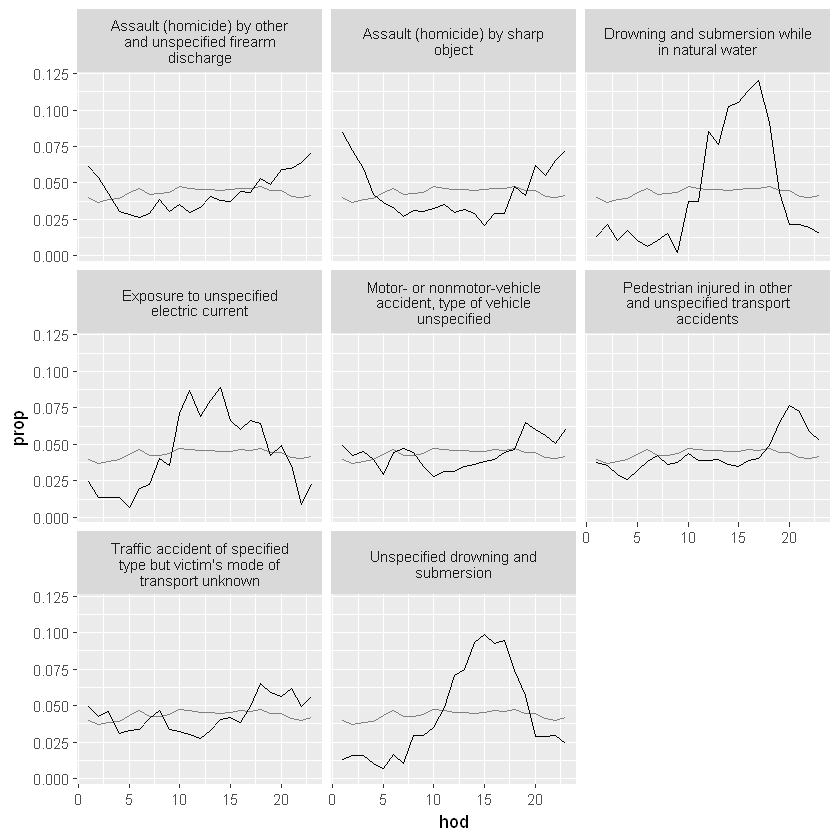

In [80]:
ggplot(hod_unusual_big, aes(hod, prop)) + 
  geom_line(aes(y = prop_all), data = overall, colour = "grey50") +
  geom_line() + 
  facet_wrap(~ disease, ncol = 3)
ggsave("unusual-big.pdf", width = 8, height = 6)

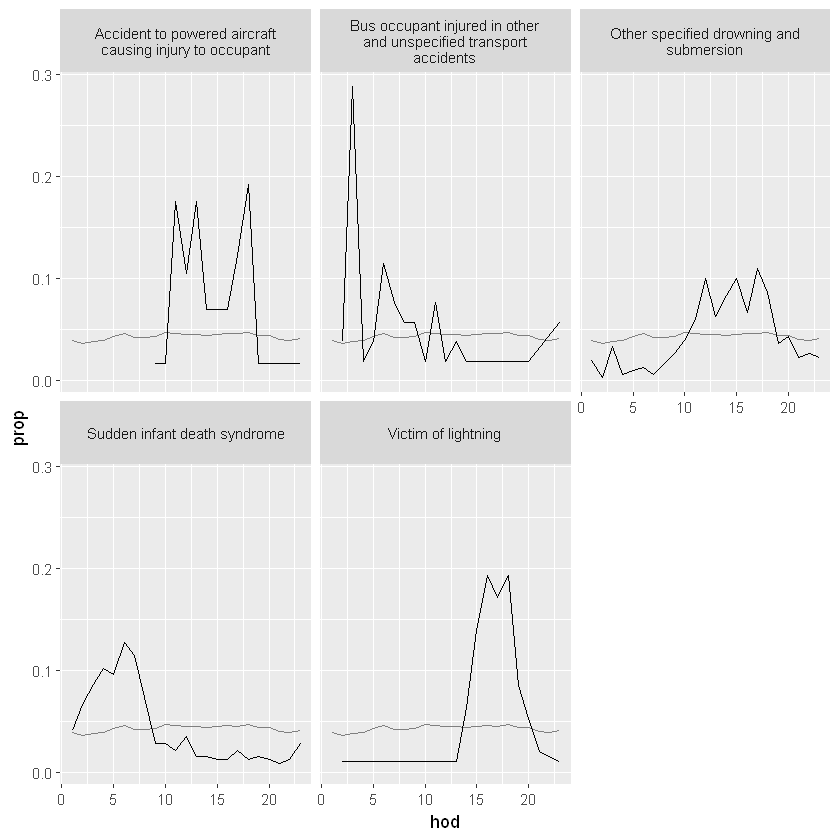

In [81]:
last_plot() %+% hod_unusual_sml
ggsave("unusual-sml.pdf", width = 8, height = 4)